## Segmentation Analysis

In this project, we will start with doing clustering analysis of customers and then analyze what are the frequencies of the customer visting, which brand they pick and what quantities they offer.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

Let's load the dataframe.

In [ ]:
df_segment = pd.read_csv("segmentation data.csv",index_col=0)
df_segment.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


Let's write the information about the dataset: <br/>
* **Sex** - Biological sex (gender) of a customer. In this dataset there are only 2 different options. 0-Male , 1-Female
* **Marital status** - Marital status of a customer. 0	single	 1	non-single (divorced / separated / married / widowed)
* **Age** - The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset
* **Education** - Level of education of the customer  {0,1,2,3}	Level of education of the customer 0	other / unknown 1	high school 2	university 3	graduate school
* **Income** - Self-reported annual income in US dollars of the customer. Min value (the lowest income observed in the dataset)	 Max value (the highest income observed in the dataset)
* **Occupation**  - Category of occupation of the customer. 0	unemployed / unskilled,	1	skilled employee / official,	2	management / self-employed / highly qualified employee / officer
* **Settlement size** - The size of the city that the customer lives in. 0	small city, 1	mid-sized city, 2	big city










#### Exploring the data
Now let's explore the data.

In [ ]:
df_segment.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


So, from the above, we have 200 observations and don't have any null values. Approx 55% of the data is of male and minimum age is of 18 and maximum age is of 76.

Let's explore, how the data of education is related to gender.

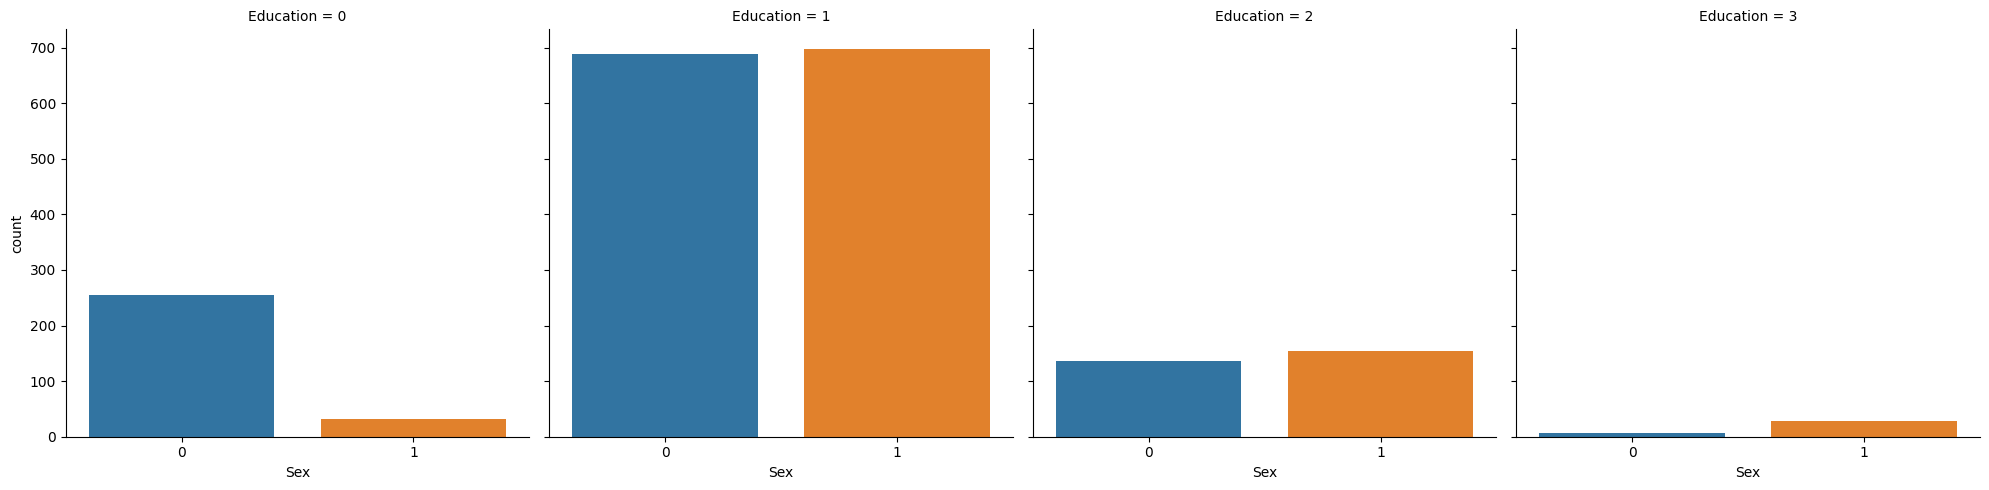

In [ ]:
sns.catplot(data=df_segment,x="Sex",kind="count",col="Education")

On exploring it looks like females have more education than males. Now let's compare the data of education to income.

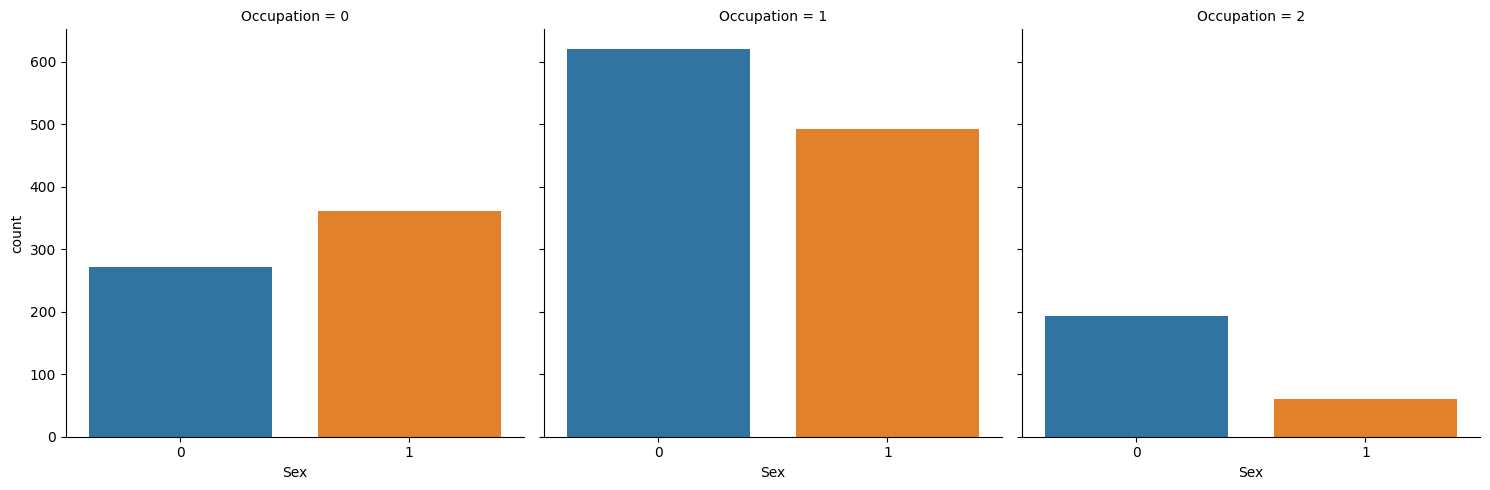

In [ ]:
sns.catplot(data=df_segment,x="Sex",kind="count",col="Occupation")

In general, males are more employed as compared to females. Let's plot the income distribution.

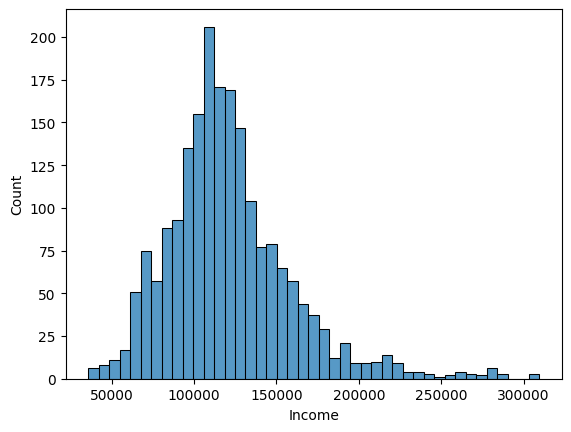

In [ ]:
sns.histplot(data=df_segment,x="Income");

Let's see how age and income are related to each other.

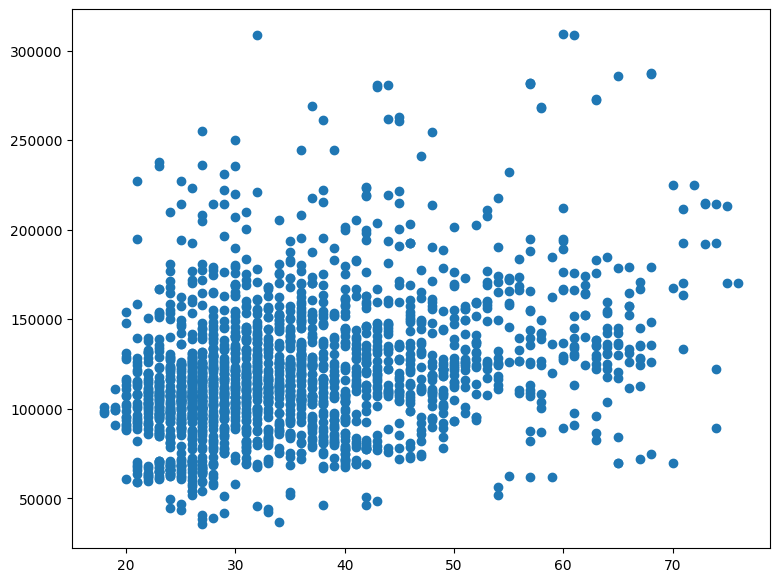

In [ ]:
plt.figure(figsize = (9, 7))
plt.scatter(x="Age",y="Income",data=df_segment)

#### Correlation estimate
Let's see how each variables relates to the other using heatmap.

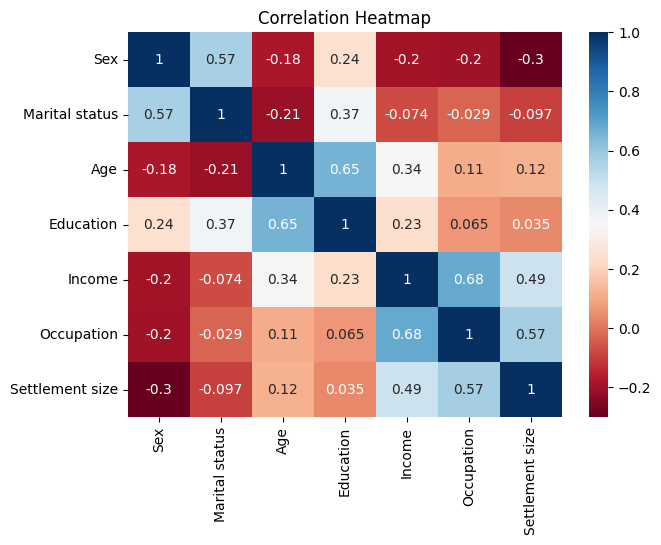

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df_segment.corr(),
           annot=True,
           cmap="RdBu")
plt.title('Correlation Heatmap')
plt.show()

From above, we see there is strong co-relation between the Income & Occupation and Age & Education. Let's use Variance Inflation Factor to see, whether there is any multicollinearity in our data or not. The VIF measures the degree to which the variance of the estimated regression coefficient is increased due to multicollinearity. Specifically, it quantifies how much the variance of the estimated coefficient for a particular independent variable is increased compared to if that variable were uncorrelated with the other independent variables in the model.

A VIF value of 1 indicates no multicollinearity, while higher values indicate increasing levels of multicollinearity. Typically, a VIF value above 5 or 10 is considered high, suggesting a significant degree of multicollinearity.

In [ ]:
# Let's perform VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X = sm.add_constant(df_segment)
vif = pd.DataFrame()

In [ ]:
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [ ]:
vif

,Variable,VIF
0,const,25.992242
1,Sex,1.687953
2,Marital status,2.294004
3,Age,3.286799
4,Education,3.515023
5,Income,2.206642
6,Occupation,2.234818
7,Settlement size,1.613331


Since for all the variables are less than 5, not much multi-collinearity is present in the data.

Let's standardize the data.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
segment_sc = sc.fit_transform(df_segment)

#### 𝐇𝐢𝐞𝐫𝐚𝐫𝐜𝐡𝐢𝐜𝐚𝐥 𝐂𝐥𝐮𝐬𝐭𝐞𝐫𝐢𝐧𝐠
Next we will perform hierarichal clustering on the segmentation data. We will use "ward" method for distance computation and plot using dendrogram.

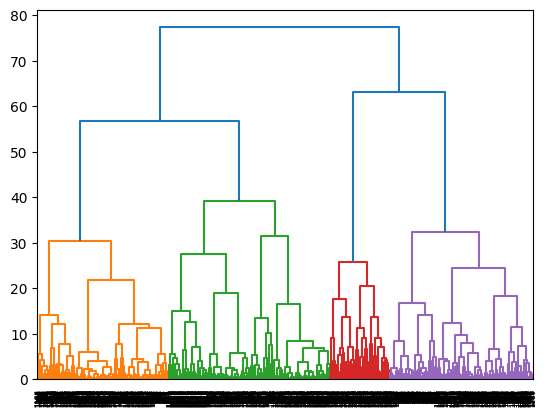

In [ ]:
import scipy.cluster.hierarchy as shc
dendro = shc.dendrogram(shc.linkage(segment_sc,method="ward"))

This is bit difficult to visualize, so we will set the `truncate_mode` to `level` and value of `p` to 5. Truncation is used to condense the dendrogram.

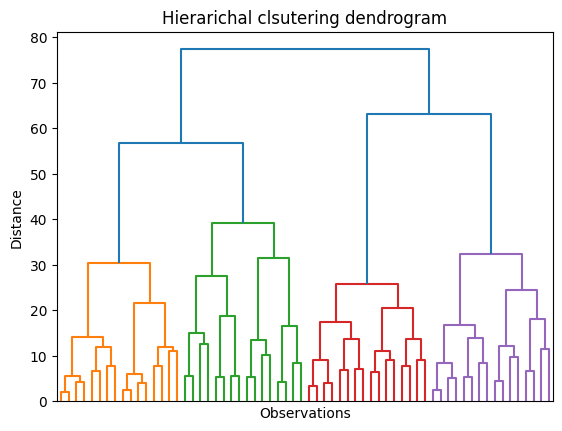

In [ ]:
dendro = shc.dendrogram(shc.linkage(segment_sc,method="ward"),truncate_mode="level",p=5,no_labels=True)
plt.title("Hierarichal clsutering dendrogram")
plt.xlabel('Observations')
plt.ylabel('Distance');

So, the optimal number of clusters are 4, it is also evident from colors and also from the largest vertical line that goes from 40 to 57 approx and doesn't cut it by horizontal line in this mentioned limit.

#### KMeans clustering
We will verify our result by performing K-Means clustering. KMenas is generally faster than Agglomerative clustering

In [ ]:
from sklearn.cluster import KMeans

For plotting the KMeans, we need to know the exact number of clusters in advance. This is ususally done by performing "Elbow" method. For this we need to compute "WCSS". WCSS stands for Within-Cluster Sum of Squares. It is a metric used in k-means clustering to evaluate the quality of the clustering solution. WCSS measures the compactness or tightness of the clusters in k-means.

In [ ]:
import warnings
# Ignore specific warning categories
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
import warnings
# Ignore specific warning categories
warnings.filterwarnings("ignore", category=UserWarning)
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",n_init="auto",random_state=1)
    kmeans.fit(segment_sc)
    wcss.append(kmeans.inertia_)
# Ignore specific warning categories
warnings.filterwarnings("ignore", category=UserWarning)

Let's plot the graph of WCSS.

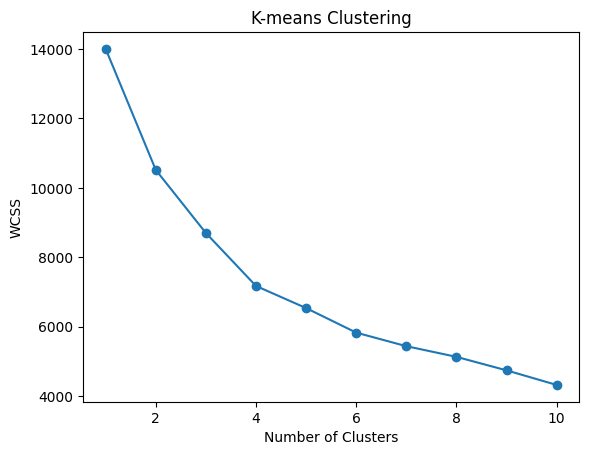

In [ ]:
plt.plot(range(1,11),wcss,marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering');

Clearly, the curve becomes starts to smoothen after 4th cluster. So, as shown in agglomerative clustering we need to make 4 clusters.

In [ ]:
# Let's fit the KMeans again with cluster=4
# Ignore specific warning categories
warnings.filterwarnings("ignore", category=UserWarning)
kmeans = KMeans(n_clusters=4,init="k-means++",n_init="auto",random_state=1)
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
kmeans.fit(segment_sc)

KMeans(n_clusters=4, n_init='auto', random_state=1)

Let's see the result of this KMeans clustering.

In [ ]:
df_segment_kmeans = df_segment.copy()
df_segment_kmeans["Segment"] = kmeans.labels_

In [ ]:
df_segment_kmeans.head(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,1
100000003,0,0,49,1,89210,0,0,2


Let's see the count of the clusters.

In [ ]:
np.unique(kmeans.labels_,return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([263, 673, 496, 568]))

Let's see the average of this K-Means segmentation, how each group performed in different categories.

In [ ]:
df_segment_analysis = df_segment_kmeans.groupby(["Segment"]).agg(np.mean)
df_segment_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.897474,0.995542,28.906389,1.063893,107558.857355,0.668648,0.445765
2,0.328629,0.086694,35.183468,0.774194,96230.304435,0.306452,0.040323
3,0.026408,0.172535,35.674296,0.732394,141106.498239,1.271127,1.524648


So, as we see in the first group *(segment 0)*, we see that the genders are balanced, average age reaches to 55. They have highest education as compared to other groups. Also, they have the highest income. In the second group *(segment 1)*, people are  generally young, mostly domniated by female gender and they have second highest education. Their data is more or less like average. In the third category *(segment 2)*, mostly are males, unmarried with average age around 35. They have low education and also lowest income in the group. So, their lies the least opportunity for the marketers. In the last category *(segment 3)* we see that, they are mostly single, with higher income and have good occupation and mostly live in mid-size to large size cities. So, based on these let's rename the sectors.

In [ ]:
df_segment_analysis.rename({0:"Well_Off",
                           1:"Standard",
                           2:"Fewer-Opportunities",
                           3:"Career Focused"})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment,,,,,,,
Well_Off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
Standard,0.897474,0.995542,28.906389,1.063893,107558.857355,0.668648,0.445765
Fewer-Opportunities,0.328629,0.086694,35.183468,0.774194,96230.304435,0.306452,0.040323
Career Focused,0.026408,0.172535,35.674296,0.732394,141106.498239,1.271127,1.524648


Let's add the number of each category in the dataframe.

In [ ]:
df_segment_kmeans[:3]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,1
100000003,0,0,49,1,89210,0,0,2


In [ ]:
df_segment_analysis["N_Obs"] = df_segment_kmeans[["Segment","Sex"]].groupby(["Segment"]).count()
df_segment_analysis.head(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N_Obs
Segment,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263
1,0.897474,0.995542,28.906389,1.063893,107558.857355,0.668648,0.445765,673
2,0.328629,0.086694,35.183468,0.774194,96230.304435,0.306452,0.040323,496


In [ ]:
df_segment_analysis["Prop"] = df_segment_analysis["N_Obs"] / df_segment_analysis["N_Obs"].sum()
df_segment_analysis.head(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N_Obs,Prop
Segment,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.897474,0.995542,28.906389,1.063893,107558.857355,0.668648,0.445765,673,0.3365
2,0.328629,0.086694,35.183468,0.774194,96230.304435,0.306452,0.040323,496,0.2480


In [ ]:
df_segment_kmeans.head(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,1
100000003,0,0,49,1,89210,0,0,2


Let's also mark the label of the segment here.

In [ ]:
df_segment_kmeans["Labels"] = df_segment_kmeans["Segment"].map({0:"Well_Off",
                           1:"Standard",
                           2:"Fewer-Opportunities",
                           3:"Career Focused"})

In [ ]:
df_segment_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment,Labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,0,Well_Off
100000002,1,1,22,1,150773,1,2,1,Standard
100000003,0,0,49,1,89210,0,0,2,Fewer-Opportunities
100000004,0,0,45,1,171565,1,1,3,Career Focused
100000005,0,0,53,1,149031,1,1,3,Career Focused


Now let's plot the data on graph.

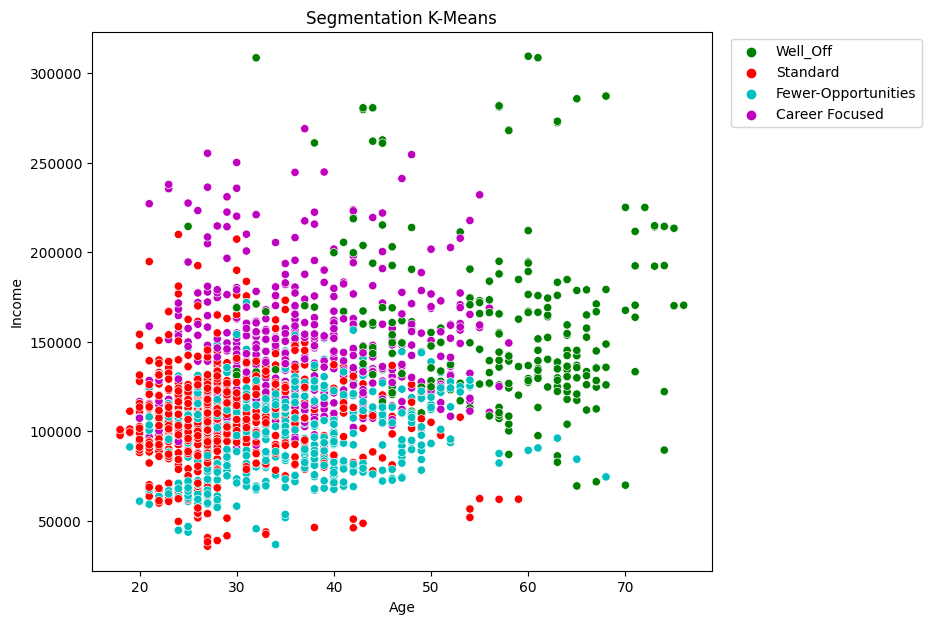

In [ ]:
plt.figure(figsize=(8,7))
sns.scatterplot(data=df_segment_kmeans,x="Age",y="Income",hue="Labels",palette=['g', 'r', 'c', 'm'])
plt.title("Segmentation K-Means")
plt.legend(loc="upper right",bbox_to_anchor=(1.35,1));

Now we will perform segmentation using PCA.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(segment_sc)

PCA()

Let's print the variance ratio of the PCA.

In [ ]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Now let's print the cumulative variance on the plot.

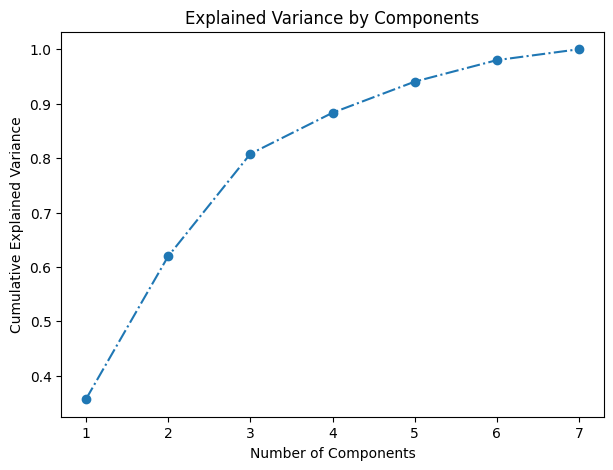

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker="o",linestyle="-.")
sns.set_style(style="darkgrid")
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

From this it looks like we can go with the 3 variables as it explained 80% of the variance. So, next we set `n_components=3` in PCA.

In [ ]:
pca = PCA(n_components=3)

In [ ]:
pca_score = pca.fit_transform(segment_sc)

Let's see the result of this.

In [ ]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [ ]:
# Make it in the dataframe.
df_pca_comp = pd.DataFrame(data=pca.components_,
                          columns=df_segment.columns,
                          index=["Component 1","Component 2","Component 3"])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


Now let's use this KMeans clustering with PCA. We have to compute wcss again.

In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",n_init="auto",random_state=1)
    kmeans.fit(pca_score)
    wcss.append(kmeans.inertia_)

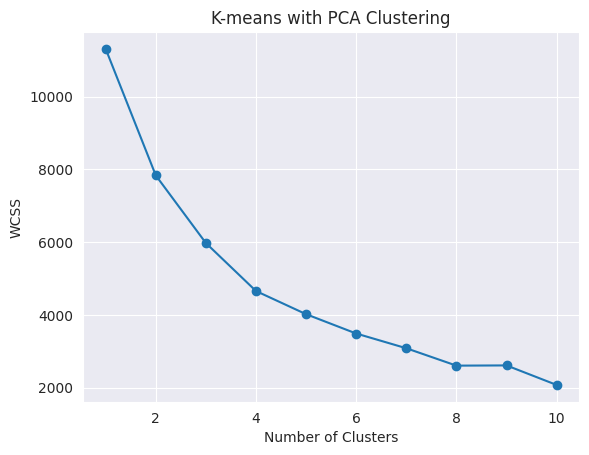

In [ ]:
# Let's plot the WCSS
plt.plot(range(1,11),wcss,marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering');

So, let's choose the optimal number of clusters as 4 and fit to the data.

In [ ]:
kmeans_pca = KMeans(n_clusters=4,init="k-means++",n_init="auto",random_state=1)
kmeans_pca.fit(pca_score)

KMeans(n_clusters=4, n_init='auto', random_state=1)

#### KMeans clustering with PCA analyzing

In [ ]:
df_seg_pca = pd.concat([df_segment.reset_index(drop=True),pd.DataFrame(pca_score)],axis=1)

In [ ]:
df_seg_pca.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
kmeans_pca.labels_

array([0, 1, 3, ..., 3, 3, 3], dtype=int32)

In [ ]:
df_seg_pca.head(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419


Let's add the customer segmentation label to it.

In [ ]:
df_seg_pca["Labels"] = kmeans_pca.labels_
df_seg_pca.head(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Labels
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,1
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,3


Now let's take the segment wise mean to see pattern of segments.

In [ ]:
df_seg_pca_freq = df_seg_pca.groupby(["Labels"]).agg(np.mean)
df_seg_pca_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Labels,,,,,,,,,,
0,0.496212,0.685606,55.863636,2.128788,158141.446970,1.117424,1.090909,1.693294,2.024125,0.869324
1,0.767754,0.975048,27.857965,1.007678,119334.583493,1.053743,0.809981,-0.406022,0.523676,-1.208082
2,0.001650,0.047855,36.651815,0.686469,138508.674917,1.201320,1.257426,1.227924,-1.211960,0.034356
3,0.627258,0.451560,33.407225,0.940887,88751.922824,0.080460,0.009852,-1.608562,-0.119469,0.622479


Let's add the number of the observation and proportion of the observation.

In [ ]:
df_seg_pca.head(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Labels
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,1
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,3


In [ ]:
df_seg_pca_freq["N_Obs"] = df_seg_pca[["Labels","Sex"]].groupby(["Labels"]).count()
df_seg_pca_freq["Prop"] = df_seg_pca_freq["N_Obs"] / df_seg_pca_freq["N_Obs"].sum()

In [ ]:
df_seg_pca_freq.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N_Obs,Prop
Labels,,,,,,,,,,,,
0,0.496212,0.685606,55.863636,2.128788,158141.446970,1.117424,1.090909,1.693294,2.024125,0.869324,264,0.1320
1,0.767754,0.975048,27.857965,1.007678,119334.583493,1.053743,0.809981,-0.406022,0.523676,-1.208082,521,0.2605
2,0.001650,0.047855,36.651815,0.686469,138508.674917,1.201320,1.257426,1.227924,-1.211960,0.034356,606,0.3030
3,0.627258,0.451560,33.407225,0.940887,88751.922824,0.080460,0.009852,-1.608562,-0.119469,0.622479,609,0.3045


Let's rename the segment as based on the approach discussed previously.

In [ ]:
df_seg_pca_freq.rename({0:"Well_Off",
                           1:"Standard",
                           2:"Fewer-Opportunities",
                           3:"Career Focused"},inplace=True)

In [ ]:
df_seg_pca_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N_Obs,Prop
Labels,,,,,,,,,,,,
Well_Off,0.496212,0.685606,55.863636,2.128788,158141.446970,1.117424,1.090909,1.693294,2.024125,0.869324,264,0.1320
Standard,0.767754,0.975048,27.857965,1.007678,119334.583493,1.053743,0.809981,-0.406022,0.523676,-1.208082,521,0.2605
Fewer-Opportunities,0.001650,0.047855,36.651815,0.686469,138508.674917,1.201320,1.257426,1.227924,-1.211960,0.034356,606,0.3030
Career Focused,0.627258,0.451560,33.407225,0.940887,88751.922824,0.080460,0.009852,-1.608562,-0.119469,0.622479,609,0.3045


Let's rename these in original dataframe as well.

In [ ]:
df_seg_pca.head(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Labels
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,1
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,3


In [ ]:
df_seg_pca["Labels"] = df_seg_pca["Labels"].map({0:"Well_Off",
                           1:"Standard",
                           2:"Fewer-Opportunities",
                           3:"Career Focused"})
df_seg_pca.head(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Labels
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,Well_Off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,Standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,Career Focused


Now let's visualize this data on the graph.

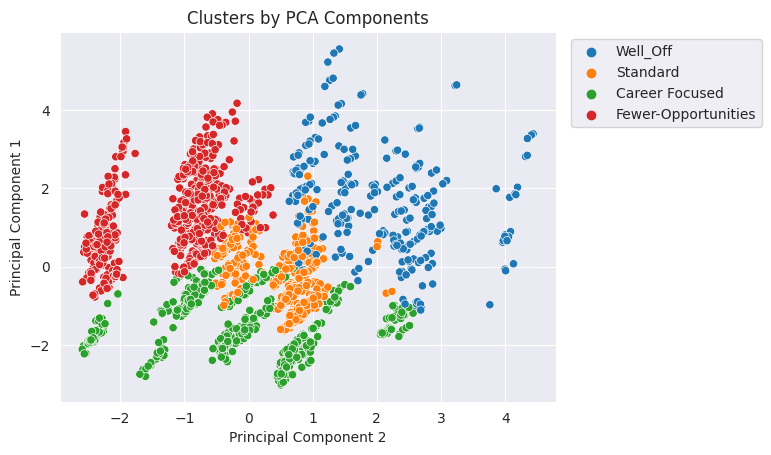

In [ ]:
sns.scatterplot(data=df_seg_pca,x="Component 2",y="Component 1",hue="Labels")
plt.xlabel("Principal Component 2")
plt.ylabel("Principal Component 1")
plt.legend(loc="upper right",bbox_to_anchor=(1.43,1.0))
plt.title("Clusters by PCA Components");

From above, we can see the plots clearly. Now let's plot along the Principal Component 1 & Principal Component 3.

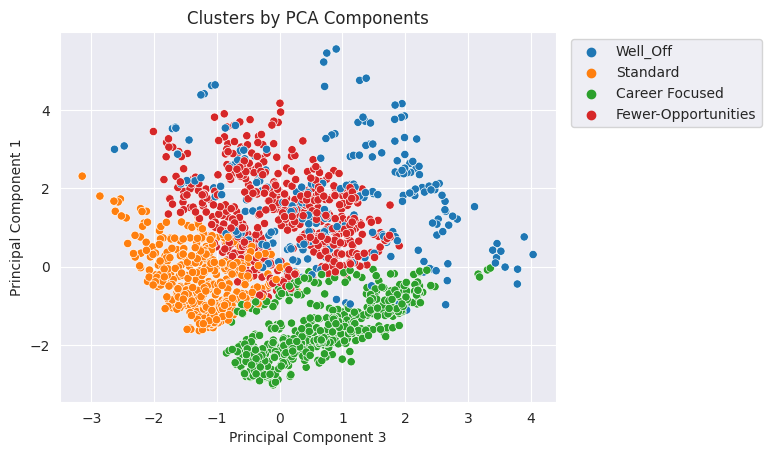

In [ ]:
sns.scatterplot(data=df_seg_pca,x="Component 3",y="Component 1",hue="Labels")
plt.xlabel("Principal Component 3")
plt.ylabel("Principal Component 1")
plt.legend(loc="upper right",bbox_to_anchor=(1.43,1.0))
plt.title("Clusters by PCA Components");

This is not clear as compared to above. Let's plot among Principal Component 2 & Principal Component 3

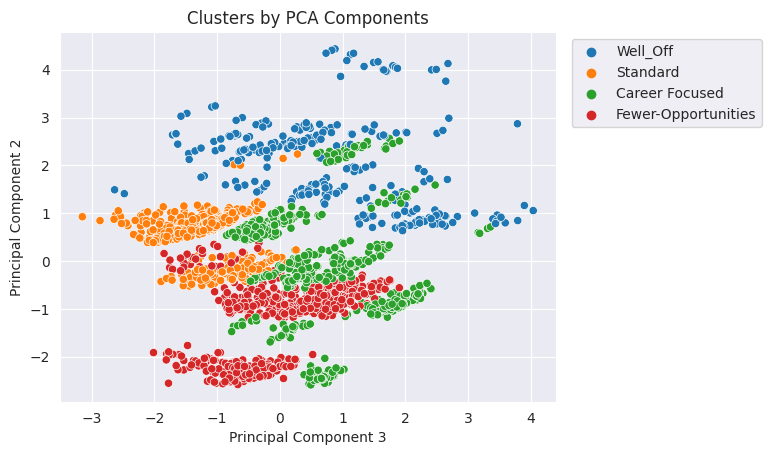

In [ ]:
sns.scatterplot(data=df_seg_pca,x="Component 3",y="Component 2",hue="Labels")
plt.xlabel("Principal Component 3")
plt.ylabel("Principal Component 2")
plt.legend(loc="upper right",bbox_to_anchor=(1.43,1.0))
plt.title("Clusters by PCA Components");

In [ ]:
df_seg_pca.head(3)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Labels
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,Well_Off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,Standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,Career Focused


Now let's see how sex-wise the data has contributed to the segmengts.

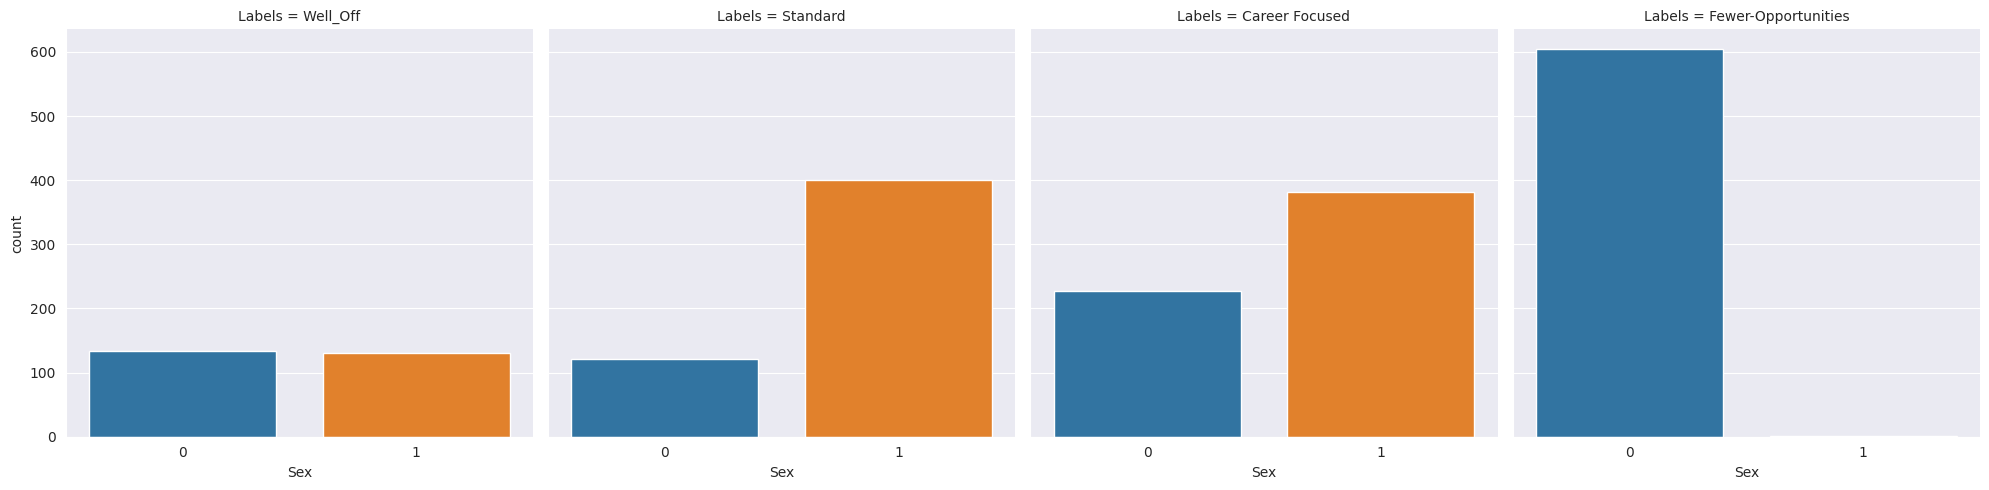

In [ ]:
sns.catplot(data=df_seg_pca,x="Sex",col="Labels",kind="count");

Mostly segment where a marketer can target *(well_off,standard,career_focused)*, has more proportion of females. So, while targeting the customers into these segment, a marketers can tailor the ads which will appeal to the women as well.

Let's save our model.

In [ ]:
pickle.dump(sc,open("sc.pickle","wb"))
pickle.dump(pca,open("pca.pickle","wb"))
pickle.dump(kmeans_pca,open("kmeans_pca.pickle","wb"))

## Purchase Analytics

So, have we have focused on segmentation analysis. Now, we will focus on purchase analytics.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
pd.set_option("display.max_columns",None)

In [ ]:
df_purchase = pd.read_csv("purchase data.csv")
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0.0,1.0,0.0,0.0,0.0,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,1.0,110866.0,1.0,0.0


In this dataset we have different customers and since a customer can make multiple purchases, ID is repeated multiple times.

Let's check whether there is any null columns in our database.

In [ ]:
df_purchase.isna().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              1
Price_2              1
Price_3              1
Price_4              1
Price_5              1
Promotion_1          1
Promotion_2          1
Promotion_3          1
Promotion_4          1
Promotion_5          1
Sex                  1
Marital status       1
Age                  1
Education            1
Income               1
Occupation           1
Settlement size      1
dtype: int64

So, we don't have any null values in our database. Let's check for any duplicated row.

In [ ]:
df_purchase[df_purchase.duplicated()]

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size


So, we don't have any null values in our dataset as well.

In [ ]:
# Let's look at the last 7 rows
df_purchase.iloc[:,-7:].head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
1,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
2,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
3,0.0,0.0,47.0,1.0,110866.0,1.0,0.0
4,0.0,0.0,47.0,1.0,110866.0,1.0,0.0


These are same as of previous dataset. So, we can load our model to make work on this data.

In [ ]:
sc = pickle.load(open("sc.pickle","rb"))
pca = pickle.load(open("pca.pickle","rb"))
kmeans_pca = pickle.load(open("kmeans_pca.pickle","rb"))

Let's perform transformation on the previous data.

In [ ]:
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_seg_scale =  sc.transform(features)

In [ ]:
# Now let's apply the principal components
purchase_seg_kmeans_pca = kmeans_pca.predict(df_purchase_seg_pca)

NameError: ignored

Since we are going to make changes in our dataframe,let's save this dataframe and apply to a new dataframe.

In [ ]:
df_purchase_predictors = df_purchase.copy()

Let's add the segment information in our newly made dataframe.

In [ ]:
df_purchase_predictors["Segment"] = purchase_seg_kmeans_pca
df_purchase_predictors.head()

Next, let's find the purchase occassion by customerID. It will tell information about the number of the visit.

In [ ]:
temp1 = df_purchase_predictors[["ID","Incidence"]].groupby(["ID"]).count()
temp1.columns=["N_Visits"]
temp1.head()

Number of purchases per CustomerID.

In [ ]:
temp2 = df_purchase_predictors[["ID","Incidence"]].groupby(["ID"]).agg({"Incidence":np.sum})
temp2.columns=["N_Purchases"]
temp3 = pd.concat([temp1,temp2],axis=1)
temp3.head()

Now let's calculate the customer visit to the average number of purchases by the customer.

In [ ]:
temp3["Average_N_Purchases"] = temp3.apply(lambda x:x[1]/x[0],axis=1)
temp3.head()

Now let's get the segment of the each customer ID.

In [ ]:
temp4 = df_purchase_predictors[["ID","Segment"]].groupby(["ID"]).agg({"Segment":np.mean})
df_purchase_descr = pd.concat([temp3,temp4],axis=1)
df_purchase_descr.head()

Let's convert the last column datatype to integer.

In [ ]:
df_purchase_descr["Segment"] = df_purchase_descr["Segment"].astype(np.int32)

In [ ]:
df_purchase_descr.head()

Let's add a column with the proportion of each column.

In [ ]:
seg_prop = df_purchase_descr[["Segment","N_Purchases"]].groupby(["Segment"]).count() / df_purchase_descr.shape[0]
seg_prop.columns = ["Segment Proportions"]
seg_prop.head()

Let's plot the segmentation proportions of a pie chart.

In [ ]:
plt.figure(figsize=(9,6))
plt.pie(seg_prop["Segment Proportions"],labels=["Well-Off","Standard","Career Focused","Fewer_opportunities"],
       autopct="%1.1f%%",
       colors=['b', 'g', 'r', 'orange'])
plt.title("Segment Proportions");

#### Purchase Occassion and Purchase Incidence

Next we will calculate the mean by the four segments. It will help us determine the average behaviour in each customer.

In [ ]:
segments_mean = df_purchase_descr.groupby(["Segment"]).agg(np.mean)
segments_mean

Next we calculate the standard deviation by the segments. It will help us in determine the homogenity of the each segment.

In [ ]:
segments_std = df_purchase_descr.groupby(["Segment"]).agg(np.std)
segments_std

Next we will plot the average number of store visits for each of the four segments using a bar chart.

In [ ]:
plt.figure(figsize=(5,4))
plt.bar(x=np.arange(0,4),
       tick_label=["Well-Off","Standard","Fewer_opportunities","Career Focused"],
       height=segments_mean["N_Visits"],
       yerr=segments_std["N_Visits"],
       color=['b', 'g', 'r', 'orange'])
plt.xlabel("Segment")
plt.xticks(rotation=45)
plt.ylabel("Average Number of Visits")
plt.title('Average Number of Store Visits by Segment')
sns.set_style(style="darkgrid")

Now let's see average number of purchases.

In [ ]:
plt.bar(x=np.arange(0,4),tick_label = ["Well-Off","Standard","Fewer_opportunities","Career Focused"],
        height = segments_mean['Average_N_Purchases'],
        yerr = segments_std['Average_N_Purchases'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Average Number of Purchases by Segment')

So, we see the avergae number of pucrchases and visit denoted by standard deviation.

#### Brand Choice

Next we will deal with brand choice. To do this, we will deal with only those rows where purchase was made.

In [ ]:
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors["Incidence"]==1]

In [ ]:
df_purchase_incidence.head()

Now let's make dummy variable for each of the five brand.

In [ ]:
brand_dummies = pd.get_dummies(df_purchase_incidence["Brand"],prefix="Brand",prefix_sep="_")
brand_dummies.head()

NameError: ignored

Let's add segment and ID as well to these brand dummies.

In [ ]:
brand_dummies["Segment"], brand_dummies["ID"] = df_purchase_incidence["Segment"], df_purchase_incidence["ID"]
brand_dummies.head()

Let's segment the data by the ID.

In [ ]:
temp = brand_dummies.groupby(["ID"]).mean()
temp.head()

Let's segregate the data according to the mean.

In [ ]:
mean_brand_choice = temp.groupby(["Segment"]).agg(np.mean)

In [ ]:
mean_brand_choice.head()

Let's make a heatmap and see it on the graph.

In [ ]:
sns.heatmap(mean_brand_choice,
           cmap="RdBu",annot=True)
plt.yticks([0,1,2,3],["Well-Off","Standard","Fewer_opportunities","Career Focused"],rotation=45)
plt.title("Average Brand Choice by Segment")
plt.show();

### Brand Revenue

Next we will deal with the revenue earned by the brands. First segregate each entry where the brand 1 was purchased. We now multiply the brand for that particular day by the qunatity of the brand purchased.

In [ ]:
df_purchase_predictors.head(1)

In [ ]:
temp = df_purchase_predictors[df_purchase_predictors["Brand"]==1]

In [ ]:
temp.head(1)

NameError: ignored

We know that the revenue is computed by the *price * quantity*.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
temp["Revenue Brand 1"] = temp.apply(lambda x: (x[7]*x[4]),axis=1)

In [ ]:
temp.head(2)

Let's make a new dataframe and store the data into it.

In [ ]:
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[["Segment","Revenue Brand 1"]] = temp[["Segment","Revenue Brand 1"]].groupby(["Segment"],
                                                                                                    as_index=False).agg(np.sum)
segments_brand_revenue

NameError: ignored

Similalry doing this for all the remaining 4 brands.

In [ ]:
temp = df_purchase_predictors[df_purchase_predictors["Brand"]==2]
temp.head(2)

In [ ]:
temp["Revenue Brand 2"] = temp.apply(lambda x:(x[7]*x[4]),axis=1)
temp.head(2)

Now aggregate the sum of the revenue for each group as we did earlier.

In [ ]:
segments_brand_revenue["Revenue Brand 2"] = temp[["Segment","Revenue Brand 2"]].groupby(["Segment"]).agg(np.sum)

In [ ]:
segments_brand_revenue

In [ ]:
# Revenue brand 3
temp = df_purchase_predictors[df_purchase_predictors["Brand"]==3]
temp["Revenue Brand 3"] = temp.apply(lambda x:(x[7]*x[4]),axis=1)
segments_brand_revenue["Revenue Brand 3"] = temp[["Segment","Revenue Brand 3"]].groupby(["Segment"]).agg(np.sum)

In [ ]:
# Revenue brand 4
temp = df_purchase_predictors[df_purchase_predictors["Brand"]==4]
temp["Revenue Brand 4"] = temp.apply(lambda x:(x[7]*x[4]),axis=1)
segments_brand_revenue["Revenue Brand 4"] = temp[["Segment","Revenue Brand 4"]].groupby(["Segment"]).agg(np.sum)

In [ ]:
# Revenue brand 45
temp = df_purchase_predictors[df_purchase_predictors["Brand"]==5]
temp["Revenue Brand 5"] = temp.apply(lambda x:(x[7]*x[4]),axis=1)
segments_brand_revenue["Revenue Brand 5"] = temp[["Segment","Revenue Brand 5"]].groupby(["Segment"]).agg(np.sum)

In [ ]:
segments_brand_revenue

Now let's calculate the total revenue from the brands for each segment.

In [ ]:
segments_brand_revenue["Total Revenue"] = segments_brand_revenue.iloc[:,1:].sum(axis=1)

In [ ]:
segments_brand_revenue.head()

Let's add segment proportion into the dataframe and rename the segments to their actual name.

In [ ]:
seg_prop

In [ ]:
segment_brand_revenue_final =  pd.concat([segments_brand_revenue,seg_prop],axis=1)


In [ ]:
segment_brand_revenue_final

In [ ]:
segment_brand_revenue_final["Segment"]= segment_brand_revenue_final["Segment"].map({0:"Well-Off",1:"Standard",2:"Fewer_opportunities",
                                                              3:"Career Focused"})
segment_brand_revenue_final = segment_brand_revenue_final.set_index(["Segment"])
segment_brand_revenue_final

### Purchase Probability Model

In the last part we dealt with descriptive analytics, next we will deal with predictive analytics.

In [ ]:
df_pa = df_purchase_predictors.copy()

In [ ]:
df_pa.head()

Let's make a new variable *y* that captures the "Incidence". Basically it is a predictor variable that we will used in Logistic Regression.

In [ ]:
y = df_pa["Incidence"]

In [ ]:
y

In [ ]:
X = pd.DataFrame()
# Let's get the mean price of the model
X["Mean Price"] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

In [ ]:
X

Now we will add another variable which will calculate logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
model_purchase = LogisticRegression()
model_purchase.fit(X,y)

In [ ]:
model_purchase.coef_

The above shows the coefficient for independent variables, which in our model is *mean price*. By this sign we know that a decrease in price would lead to an increase in purchase probability. So, this quantifies the exact relationship between price and probability of purchase.

Now we will see the price elasticity of purchase probability. It is % change in purchase probability in response to 1% change in price. Let's see their minimum and maximum price.

In [ ]:
df_pa[["Price_1","Price_2","Price_3","Price_4","Price_5"]].min()

In [ ]:
df_pa[["Price_1","Price_2","Price_3","Price_4","Price_5"]].max()

So, minimum price is 1.10 and maximum is 3.5. Let's generate the all possible values between these and see the effect of the prices.

In [ ]:
price_range = np.arange(0.5,3.5,0.01)
price_range

Storing this price information in data range.

In [ ]:
df_price_range = pd.DataFrame(price_range)

In [ ]:
y_pr = model_purchase.predict_proba(df_price_range)

In [ ]:
y_pr

Here 0 means no purchase and 1 means purchase. In above 1st value shows the probability of no purcahse and 2nd value shows the probability of the purchase.

In [ ]:
# Let's only consider the purchase probability.
purchase_prob = y_pr[:,1]

In [ ]:
purchase_prob[:10]

NameError: ignored

So, we will apply the formula E = (Δ Probability(purchase) / Probability(purchase)) / (Δ Price / Price).

Mathematically this can be reduced down to E = <i> beta * price * (1-probability(Purchase))

In [ ]:
# This is our beta
model_purchase.coef_[0]

We have got all the purchase probability in the variable purchase_prob. Now let's calculate the elasticity.

In [ ]:
# Let's write above formula into equation
pe = model_purchase.coef_[0] * price_range * (1-purchase_prob)

In [ ]:
pe[:5]

Let's get the information store in the dataframe.

In [ ]:
df_price_elasticity = pd.DataFrame(price_range)

In [ ]:
df_price_elasticity = df_price_elasticity.rename(columns={0:"Price Point"})
df_price_elasticity["Mean_PE"] = pe
df_price_elasticity

In [ ]:
pd.set_option("display.max_rows",None)

In [ ]:
df_price_elasticity

For each row, we have price and its corresponding elasticity, they will help us to determine the average customer purchase behaviour.

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color="grey")
plt.xlabel("price")
plt.ylabel("Elasticity")
plt.title("Price elasticity of purchase probability")

Now we can see entire price elasticity changes compared to the price range as function, the price elasticity decreases as price increases. Means higher the price increases, less likely that people wanted to buy it. From above, the decrease in price is slow in the range between 0.5 and 1.1, and then it become steeper after that.    

#### Purchase probability by segment
Next we use Purchase Probability by Segments

<b> Segment-1: Well-off </b>

In [ ]:
df_pa.head()

In [ ]:
df_pa["Segment"].value_counts()

In [ ]:
df_pa_segment_0 = df_pa[df_pa["Segment"]==0]
y = df_pa_segment_0["Incidence"]

In [ ]:
X = pd.DataFrame()

In [ ]:
# We calculate the average price for purchases in segment 1. Our dependant variable contains the mean price of the brands.
X['Mean_Price'] = (df_pa_segment_0['Price_1'] +
                   df_pa_segment_0['Price_2'] +
                   df_pa_segment_0['Price_3'] +
                   df_pa_segment_0['Price_4'] +
                   df_pa_segment_0['Price_5']) / 5

In [ ]:
X.head()

In [ ]:
# Fit the regression model
model_incidence_segment_0 = LogisticRegression()
model_incidence_segment_0.fit(X,y)

Let's calculate the coefficient for the model.

In [ ]:
model_incidence_segment_0.coef_

Let's calculate the predicted probability for the model.

In [ ]:
y_segment_0 = model_incidence_segment_0.predict_proba(df_price_range)

In [ ]:
y_purchase_segment_0 = y_segment_0[:,1]
pe_segment_0 = model_incidence_segment_0.coef_[0] * price_range * (1-y_purchase_segment_0)

In [ ]:
pd.reset_option('display.max_rows')

In [ ]:
df_price_elasticity["PE_Segment_0"] = pe_segment_0

Let's plot a graph.

In [ ]:
# We plot the elasticities of the average customer and the career-focused segment side by side.
# The career-focused segment is displayed in green. The same color we used during the descriptive analysis.
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color="grey",label="Overall")
plt.plot(price_range,pe_segment_0,color="blue",label="Well-off")
plt.xlabel("Price")
plt.ylabel("Price")
plt.title('Price Elasticity of Purchase Probability')
plt.legend();

So, as we see even after following the similar pattern till 1.1, for well-off category, price-elasticity is lower as compared to overall.

#### Segment-2: Standard

In [ ]:
df_pa_segment_1 = df_pa[df_pa["Segment"]==1]

In [ ]:
df_pa_segment_1.head()

In [ ]:
X = pd.DataFrame()
X["Mean Price"] = (df_pa_segment_1["Price_1"] + df_pa_segment_1["Price_2"] + df_pa_segment_1["Price_3"] +
                        df_pa_segment_1["Price_4"] + df_pa_segment_1["Price_5"]) / 5
X.head()

In [ ]:
y = df_pa_segment_1["Incidence"]

In [ ]:
model_incidence_segment_1 = LogisticRegression()
model_incidence_segment_1.fit(X,y)

In [ ]:
model_incidence_segment_1.coef_

In [ ]:
y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment1 = y_segment_1[:,1]

In [ ]:
# Calculate price elasticities
pe_segment_1 = model_incidence_segment_1.coef_[0] * price_range * (1-purchase_pr_segment1)

Let's plot this on the graph.

In [ ]:
df_price_elasticity['PE_Segment_1'] = pe_segment_1

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(price_range, pe, color = 'grey',label="Overall")
plt.plot(price_range, pe_segment_0, color = 'blue',label="Well_off")
plt.plot(price_range,pe_segment_1,color="yellow",label="Standard")
plt.xlabel("Price")
plt.ylabel("Elasticity")
plt.title("Price Elasticity of Purchase Probability")
plt.legend();

#### Segment-3:  Career-Focused

In [ ]:
df_pa_segment_2 = df_pa[df_pa["Segment"]==2]
df_pa_segment_2.head()

In [ ]:
y = df_pa_segment_2["Incidence"]

In [ ]:
X = pd.DataFrame()
X["Mean_Price"] = (df_pa_segment_2["Price_1"] + df_pa_segment_2["Price_2"] + df_pa_segment_2["Price_3"] +
                        df_pa_segment_2["Price_4"] + df_pa_segment_2["Price_5"]) / 5

In [ ]:
model_incidence_segment_2 = LogisticRegression()
model_incidence_segment_2.fit(X,y)

In [ ]:
y_segment_2 = model_incidence_segment_2.predict_proba(df_price_range)[:,1]

In [ ]:
pe_segment_2 = model_incidence_segment_2.coef_[0] * price_range * (1-y_segment_2)

In [ ]:
df_price_elasticity.head()

In [ ]:
df_price_elasticity['PE_Segment_2'] = pe_segment_2

Let's plot this on the graph.

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(price_range, pe, color = 'grey',label="Overall")
plt.plot(price_range, pe_segment_0, color = 'blue',label="Well_off")
plt.plot(price_range,pe_segment_1,color="yellow",label="Standard")
plt.plot(price_range,pe_segment_2,color="green",label="Fewer-opportunities")
plt.xlabel("Price")
plt.ylabel("Elasticity")
plt.title("Price Elasticity of Purchase Probability")
plt.legend();

#### Segment-4: Fewer-opportunities

In [ ]:
df_pa_segment_3 = df_pa[df_pa["Segment"]==3]

In [ ]:
y = df_pa_segment_3["Incidence"]

In [ ]:
X = pd.DataFrame()
X["Mean_Price"] = (df_pa_segment_3["Price_1"] + df_pa_segment_3["Price_2"] + df_pa_segment_3["Price_3"] +
                        df_pa_segment_3["Price_4"] + df_pa_segment_3["Price_5"]) / 5

In [ ]:
model_incidence_segment_3 = LogisticRegression()
model_incidence_segment_3.fit(X,y)

In [ ]:
y_segment_3 = model_incidence_segment_3.predict_proba(df_price_range)[:,1]

In [ ]:
pe_segment_3 = model_incidence_segment_3.coef_[0] * price_range * (1-y_segment_3)

In [ ]:
df_price_elasticity['PE_Segment_3'] = pe_segment_3

Let's plot this on the graph.

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(price_range, pe, color = 'grey',label="Overall")
plt.plot(price_range, pe_segment_0, color = 'blue',label="Well_off")
plt.plot(price_range,pe_segment_1,color="yellow",label="Standard")
plt.plot(price_range,pe_segment_2,color="green",label="Fewer-opportunities")
plt.plot(price_range,pe_segment_3,color="red",label="Career_focused")
plt.xlabel("Price")
plt.ylabel("Elasticity")
plt.title("Price Elasticity of Purchase Probability")
plt.legend();

#### Purchase probability with Promotion Feature

In [ ]:
X = pd.DataFrame()
X["Mean_Price"] = (df_pa["Price_1"] + df_pa["Price_2"] + df_pa["Price_3"] + df_pa["Price_4"] + df_pa["Price_5"]) / 5

In [ ]:
X["Mean_Promotion"] = (df_pa["Promotion_1"]+df_pa["Promotion_2"]+df_pa["Promotion_3"]+df_pa["Promotion_4"]+df_pa["Promotion_5"]) / 5

In [ ]:
y = df_pa["Incidence"]

In [ ]:
X.head()

Let's make a new logistic regression model.

In [ ]:
model_incidence_promotion = LogisticRegression()
model_incidence_promotion.fit(X,y)

In [ ]:
model_incidence_promotion.coef_

So, we have got one negative coefficient promotion and one positive coeff. Negative coeff. refers to Price and positive coeff refers to promotion. So, it shows that if the price goes up  quantity purchase goes down and if we do promotion. quantity purchase goes up.  

So, with the help of these two, we would calcualte the price probability with promotion.

#### Calculating price elasticity with Promotion.

In [ ]:
df_price_elasticity_promotion = pd.DataFrame(data=price_range)
df_price_elasticity_promotion.columns= ["Price_Range"]

In [ ]:
df_price_elasticity_promotion[:5]

In [ ]:
df_price_elasticity_promotion["Promotion"] = 1

In [ ]:
df_price_elasticity_promotion

In [ ]:
y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion.values)

In [ ]:
y_promotion[:5]

In [ ]:
promo = y_promotion[:,1]
price_elasticity_promo = model_incidence_promotion.coef_[:,0] * price_range * (1-promo)

In [ ]:
model_incidence_promotion.coef_

In [ ]:
model_incidence_promotion.coef_[:,0]

#### Price elasticity with no promotion activities

In [ ]:
df_price_elasticity_promotion_no = pd.DataFrame(data=price_range)
df_price_elasticity_promotion_no.columns = ["Price_Range"]

Setting the promotion features to 0.

In [ ]:
df_price_elasticity_promotion_no["Promotion"] = 0

In [ ]:
df_price_elasticity_promotion_no.head(3)

Calculating the purchase Probability Without Promotion Model Prediction.

In [ ]:
y_promo_no = model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no.values)

In [ ]:
y_promo_no = y_promo_no[:,1]

In [ ]:
price_elasticity_promo_no = model_incidence_promotion.coef_[:,0] * price_range * (1-y_promo_no)

Now upadting the master dataframe to include purchase probability elasticities without promotion.

In [ ]:
df_price_elasticity["Elasticity_Promotion_0"] = price_elasticity_promo_no

Let's plot these characteristics for the side-by-side comparison.

In [ ]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_promo_no,label="No Promotion")
plt.plot(price_range, price_elasticity_promo,label="With Promotion")
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')
plt.legend();

This graph tells us that elasticity curve with promotion sits above its respective no promotion counterpart for its entire region. Price above seems to be inelastic and at bottom it seems to be elastic.  

### Brand choice
Now we will make a model to predict, what kind of choices people make when chosing the brand.

In [ ]:
# Selecting all the row where the incidence is equal to 1
brand_choice = df_pa[df_pa["Incidence"]==1]

In [ ]:
# We will display only 100 rows. So, let's set the row to 100.
pd.set_option("display.max_rows",100)
brand_choice

Let's separate the brand choice as a dependent variable.

In [ ]:
y = brand_choice["Brand"]

In [ ]:
brand_choice.columns

We will use prices as independent features.

In [ ]:
features = ["Price_1","Price_2","Price_3","Price_4","Price_5"]
X = brand_choice[features]

In [ ]:
# Making a regression model
model_brand_choice = LogisticRegression()
model_brand_choice.fit(X,y)

In [ ]:
# Let's check for the coefficients
model_brand_choice.coef_

In [ ]:
# Let's store this in a dataframe
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

In [ ]:
# Let's store coefficient in columns and prices in index
bc_coef = bc_coef.T
bc_coef.columns = ["Coef_Brand_1","Coef_Brand_2","Coef_Brand_3","Coef_Brand_4","Coef_Brand_5"]
bc_coef.index = ["Price_1","Price_2","Price_3","Price_4","Price_5"]
bc_coef = bc_coef.round(2)
bc_coef

Now we can easily see the beat value. Let's start with brand_1. The coefficient of the own brand with respect to the prices, negative, while its positive for all other prices, except the 5th. We know that higher the price of own product, the lower the probability for it to be purchased. On the other hand, the more the price of the competitor increases, the higher the probability of the customers switching to our own brand would be.

The choice probability for any one brand and the choice probabilities for all the other brands are interrelated. And a marketing mix tool of our brand reflects not only the choice probability for that brand, but the choice probabilities for all other brands as well. These effects are known as own brand effects and cross brand effects.

#### Own price elasticity for brand 5

In [ ]:
df_own_brand_5 = pd.DataFrame(index=np.arange(len(price_range)))
df_own_brand_5["Price_1"] = brand_choice["Price_1"].mean()
df_own_brand_5["Price_2"] = brand_choice["Price_2"].mean()
df_own_brand_5["Price_3"] = brand_choice["Price_3"].mean()
df_own_brand_5["Price_4"] = brand_choice["Price_4"].mean()
df_own_brand_5["Price_5"] = price_range # we are calculating own price elasticity

In [ ]:
df_own_brand_5

In [ ]:
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)

NameError: ignored

In [ ]:
pr_own_brand_5 = predict_brand_5[:,4]

We will select the price 5 index, meaning the 4th index.

In [ ]:
beta_5 = bc_coef.iloc[4,4]
beta_5

Let's use the formula to calculate the own price elasticty of brand 5.

In [ ]:
own_price_elasticity_brand_5 = beta_5 * price_range * (1-pr_own_brand_5)

In [ ]:
df_price_elasticity["Brand_5"] = own_price_elasticity_brand_5
pd.set_option("display.max_rows",None)

In [ ]:
df_price_elasticity

Finally we plot the elasticity of the brand 5 across the different price points.

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(price_range,own_price_elasticity_brand_5,color="grey")
plt.xlabel("Price 5")
plt.ylabel("Elasticity")
plt.title("Own Price Elasticity of Purchase Probability for Brand 5")

Now, let's see what would happen to brand 5, if the competitor changes the pricing. So, let's compare **Cross Price ELasticity of Brand 5 compared to Brand 4**

In [ ]:
df_brand_5_cross_brand_4 = pd.DataFrame(index=np.arange(price_range.size))
df_brand_5_cross_brand_4["Price_1"] = brand_choice["Price_1"].mean()
df_brand_5_cross_brand_4["Price_2"] = brand_choice["Price_2"].mean()
df_brand_5_cross_brand_4["Price_3"] = brand_choice["Price_3"].mean()
df_brand_5_cross_brand_4["Price_4"] = price_range
df_brand_5_cross_brand_4["Price_5"] = brand_choice["Price_5"].mean()

In [ ]:
df_brand_5_cross_brand_4.head()

Next compute the model probabilities.

In [ ]:
predict_brand_5_cross_brand_4 = model_brand_choice.predict_proba(df_brand_5_cross_brand_4)

In order to calculate cross price elasticities, we use a different formula: <br/>
&emsp; <i> E = -beta(own_price) * price(cross brand) * Probability(cross brand) </i>

Let's implement the formula.

In [ ]:
pr_brand_4 = predict_brand_5_cross_brand_4[:,3] # Since we want the probaility of 4th brand (position is 3rd)

In [ ]:
# We have already calculated betas
beta_5

Now we have got all the data to fit in the equation.  

In [ ]:
brand_5_cross_brand_4_price_elasticity = -beta_5 * price_range * pr_brand_4

In [ ]:
df_price_elasticity["Brand_5_Cross_Brand_4"] = brand_5_cross_brand_4_price_elasticity
df_price_elasticity

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(price_range,brand_5_cross_brand_4_price_elasticity,color="grey")
plt.xlabel("Price 4")
plt.ylabel("Elasticity")
plt.title("Cross Price Elasticity Brand 5 w.r.t. to Brand 4.")

From above elasticity is positive across the price range, this indicates that if competitor brand for price increases, the purchase probability of our own brand would increase. If the cross price elasticity is greater than zero, the two products are considered subsitutes.   

### Own and Cross-Price Elasticity by Segments
#### <u> Well-off segment </u>

In [ ]:
brand_choice_s0 = df_pa[df_pa["Incidence"]==1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0["Segment"]==0]

# Let's see the 100 rows
pd.set_option("display.max_rows",100)
brand_choice_s0

Now let's build Brand Choice Model Estimation

In [ ]:
y = brand_choice_s0["Brand"]

In [ ]:
brand_choice_s0 = pd.get_dummies(data=brand_choice_s0,columns=["Brand"],prefix="Brand",prefix_sep="_")

In [ ]:
features

In [ ]:
brand_choice_s0[features][:5]

In [ ]:
X = brand_choice_s0[features]

Let's make a logistic regression model.

In [ ]:
model_brand_choice_s0 = LogisticRegression()
model_brand_choice_s0.fit(X,y)

Let's build a coefficient table for segment 0

In [ ]:
model_brand_choice_s0.coef_

In [ ]:
bc_coef = pd.DataFrame(model_brand_choice_s0.coef_.T)
bc_coef.columns = ["Coef_Brand_1","Coef_Brand_2","Coef_Brand_3","Coef_Brand_4","Coef_Brand_5"]
bc_coef.index = ["Price_1","Price_2","Price_3","Price_4","Price_5"]
bc_coef = bc_coef.round(2)
bc_coef

#### Own price brand elasticity

In [ ]:
# Calculating own price brand elasticity for brand 5
df_own_brand_5_s0 = pd.DataFrame(index=np.arange(len(price_range)))
df_own_brand_5_s0["Price_1"] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0["Price_2"] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0["Price_3"] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0["Price_4"] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0["Price_5"] = price_range

In [ ]:
predict_own_brand_5_s0 = model_brand_choice_s0.predict_proba(df_own_brand_5_s0)
pr_own_brand_5_s0 = predict_own_brand_5_s0[: , 4]

own_price_elasticity_brand_5_s0 =  beta_5 * price_range * (1 - pr_own_brand_5_s0)
df_price_elasticity['Brand 5 S0'] = own_price_elasticity_brand_5_s0

#### Cross brand price elasticity

In [ ]:
df_brand_5_cross_brand_4_s0 = pd.DataFrame(index=np.arange(len(price_range)))
df_brand_5_cross_brand_4_s0["Price_1"] = brand_choice_s0['Price_1'].mean()
df_brand_5_cross_brand_4_s0["Price_2"] = brand_choice_s0['Price_2'].mean()
df_brand_5_cross_brand_4_s0["Price_3"] = brand_choice_s0['Price_3'].mean()
df_brand_5_cross_brand_4_s0["Price_4"] = price_range
df_brand_5_cross_brand_4_s0["Price_5"] = brand_choice_s0['Price_5'].mean()

In [ ]:
# Calculating the predicted probability
predict_brand_5_cross_brand_4_s0 = model_brand_choice_s0.predict_proba(df_brand_5_cross_brand_4_s0)
pr_cross_brand_5_s0 = predict_brand_5_cross_brand_4_s0[:,3]

Update master data frame to include the newly obtained cross-brand price elasticity.

In [ ]:
brand_5_cross_brand_4_price_elasticity_s0 = -beta_5 * price_range * pr_cross_brand_5_s0
df_price_elasticity["Brand_5_Cross_Brand_4_s0"] = brand_5_cross_brand_4_price_elasticity_s0

In [ ]:
pd.options.display.max_rows = None
df_price_elasticity

In [ ]:
# Using a figure with axes we plot the own brand and cross brand elasticity for brand 5 cross brand 4 side by side
fig,axs =  plt.subplots(1,2,figsize=(14,4))
axs[0].plot(price_range,own_price_elasticity_brand_5_s0,color="blue")
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel("Price 5")

axs[1].plot(price_range,brand_5_cross_brand_4_price_elasticity_s0,color="blue")
axs[1].set_title("Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off")
axs[1].set_xlabel("Price 4")

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

#### <u> Standard segment </u>

In [ ]:
brand_choice_s1 = df_pa[df_pa["Incidence"]==1]
brand_choice_s1 = brand_choice_s1[brand_choice_s1["Segment"]==1]

In [ ]:
# Brand model choice estimation
y = brand_choice_s1["Brand"]
brand_choice_s1 = pd.get_dummies(data=brand_choice_s1,columns=["Brand"],prefix="Brand",prefix_sep="_")
X = brand_choice_s1[features]

In [ ]:
model_brand_choice_s1 = LogisticRegression()
model_brand_choice_s1.fit(X,y)

Making a coefficient table for segment 1, Standard Segment

In [ ]:
bc_coef = pd.DataFrame(model_brand_choice_s1.coef_.T)
bc_coef.columns = ["Coef_Brand_1","Coef_Brand_2","Coef_Brand_3","Coef_Brand_4","Coef_Brand_5"]
bc_coef.index = ["Price_1","Price_2","Price_3","Price_4","Price_5"]
bc_coef = bc_coef.round(2)
bc_coef

#### Own Brand Price Elasticity

In [ ]:
# Calculating own price brand elasticity for brand 5
df_own_brand_5_s1 = pd.DataFrame(index=np.arange(len(price_range)))
df_own_brand_5_s1["Price_1"] = brand_choice_s1['Price_1'].mean()
df_own_brand_5_s1["Price_2"] = brand_choice_s1['Price_2'].mean()
df_own_brand_5_s1["Price_3"] = brand_choice_s1['Price_3'].mean()
df_own_brand_5_s1["Price_4"] = brand_choice_s1['Price_4'].mean()
df_own_brand_5_s1["Price_5"] = price_range

In [ ]:
predict_own_brand_5_s1 = model_brand_choice_s1.predict_proba(df_own_brand_5_s1)
pr_own_brand_5_s1 = predict_own_brand_5_s1[: , 4]

own_price_elasticity_brand_5_s1 =  beta_5 * price_range * (1 - pr_own_brand_5_s1)
df_price_elasticity['Brand 5 S1'] = own_price_elasticity_brand_5_s1

#### Cross brand price elasticity

In [ ]:
df_brand_5_cross_brand_4_s1 = pd.DataFrame(index=np.arange(len(price_range)))
df_brand_5_cross_brand_4_s1["Price_1"] = brand_choice_s1['Price_1'].mean()
df_brand_5_cross_brand_4_s1["Price_2"] = brand_choice_s1['Price_2'].mean()
df_brand_5_cross_brand_4_s1["Price_3"] = brand_choice_s1['Price_3'].mean()
df_brand_5_cross_brand_4_s1["Price_4"] = price_range
df_brand_5_cross_brand_4_s1["Price_5"] = brand_choice_s1['Price_5'].mean()

In [ ]:
# Calculating the predicted probability
predict_brand_5_cross_brand_4_s1 = model_brand_choice_s1.predict_proba(df_brand_5_cross_brand_4_s1)
pr_cross_brand_5_s1 = predict_brand_5_cross_brand_4_s1[:,3]

In [ ]:
# Updating the master table
brand_5_cross_brand_4_price_elasticity_s1 = -beta_5 * price_range * pr_cross_brand_5_s1
df_price_elasticity["Brand_5_Cross_Brand_4_s1"] = brand_5_cross_brand_4_price_elasticity_s1

In [ ]:
# Using a figure with axes we plot the own brand and cross brand elasticity for brand 5 cross brand 4 side by side
fig,axs =  plt.subplots(1,2,figsize=(14,4))
axs[0].plot(price_range,own_price_elasticity_brand_5_s1,color="orange")
axs[0].set_title('Brand 5 Segment Standard')
axs[0].set_xlabel("Price 5")

axs[1].plot(price_range,brand_5_cross_brand_4_price_elasticity_s1,color="orange")
axs[1].set_title("Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Standard")
axs[1].set_xlabel("Price 4")

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

#### <u> Fewer opportunity segment </u>

In [ ]:
brand_choice_s2 = df_pa[df_pa["Incidence"]==1]
brand_choice_s2 = brand_choice_s2[brand_choice_s2["Segment"]==2]

In [ ]:
# Brand model choice estimation
y = brand_choice_s2["Brand"]
brand_choice_s2 = pd.get_dummies(data=brand_choice_s2,columns=["Brand"],prefix="Brand",prefix_sep="_")
X = brand_choice_s2[features]

In [ ]:
model_brand_choice_s2 = LogisticRegression()
model_brand_choice_s2.fit(X,y)

Making a coefficient table for segment 2, Fewer opportunity segment

In [ ]:
bc_coef = pd.DataFrame(model_brand_choice_s2.coef_.T)
bc_coef.columns = ["Coef_Brand_1","Coef_Brand_2","Coef_Brand_3","Coef_Brand_4","Coef_Brand_5"]
bc_coef.index = ["Price_1","Price_2","Price_3","Price_4","Price_5"]
bc_coef = bc_coef.round(2)
bc_coef

#### Own Brand Price Elasticity

In [ ]:
# Calculating own price brand elasticity for brand 5
df_own_brand_5_s2 = pd.DataFrame(index=np.arange(len(price_range)))
df_own_brand_5_s2["Price_1"] = brand_choice_s2['Price_1'].mean()
df_own_brand_5_s2["Price_2"] = brand_choice_s2['Price_2'].mean()
df_own_brand_5_s2["Price_3"] = brand_choice_s2['Price_3'].mean()
df_own_brand_5_s2["Price_4"] = brand_choice_s2['Price_4'].mean()
df_own_brand_5_s2["Price_5"] = price_range

In [ ]:
predict_own_brand_5_s2 = model_brand_choice_s2.predict_proba(df_own_brand_5_s2)
pr_own_brand_5_s2 = predict_own_brand_5_s2[: , 4]

own_price_elasticity_brand_5_s2 =  beta_5 * price_range * (1 - pr_own_brand_5_s2)
df_price_elasticity['Brand 5 S2'] = own_price_elasticity_brand_5_s2

#### Cross brand price elasticity

In [ ]:
df_brand_5_cross_brand_4_s2 = pd.DataFrame(index=np.arange(len(price_range)))
df_brand_5_cross_brand_4_s2["Price_1"] = brand_choice_s2['Price_1'].mean()
df_brand_5_cross_brand_4_s2["Price_2"] = brand_choice_s2['Price_2'].mean()
df_brand_5_cross_brand_4_s2["Price_3"] = brand_choice_s2['Price_3'].mean()
df_brand_5_cross_brand_4_s2["Price_4"] = price_range
df_brand_5_cross_brand_4_s2["Price_5"] = brand_choice_s2['Price_5'].mean()

In [ ]:
# Calculating the predicted probability
predict_brand_5_cross_brand_4_s2 = model_brand_choice_s2.predict_proba(df_brand_5_cross_brand_4_s2)
pr_cross_brand_5_s2 = predict_brand_5_cross_brand_4_s2[:,3]

In [ ]:
# Updating the master table
brand_5_cross_brand_4_price_elasticity_s2 = -beta_5 * price_range * pr_cross_brand_5_s2
df_price_elasticity["Brand_5_Cross_Brand_4_s2"] = brand_5_cross_brand_4_price_elasticity_s2

In [ ]:
# Using a figure with axes we plot the own brand and cross brand elasticity for brand 5 cross brand 4 side by side
fig,axs =  plt.subplots(1,2,figsize=(14,4))
axs[0].plot(price_range,own_price_elasticity_brand_5_s2,color="red")
axs[0].set_title('Brand 5 Segment Fewer-opportunities')
axs[0].set_xlabel("Price 5")

axs[1].plot(price_range,brand_5_cross_brand_4_price_elasticity_s2,color="red")
axs[1].set_title("Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Fewer-opportunities")
axs[1].set_xlabel("Price 4")

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

#### <u> Career Focused segment </u>

In [ ]:
brand_choice_s3 = df_pa[df_pa["Incidence"]==1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3["Segment"]==3]

In [ ]:
# Brand model choice estimation
y = brand_choice_s3["Brand"]
brand_choice_s3 = pd.get_dummies(data=brand_choice_s3,columns=["Brand"],prefix="Brand",prefix_sep="_")
X = brand_choice_s3[features]

In [ ]:
model_brand_choice_s3 = LogisticRegression()
model_brand_choice_s3.fit(X,y)

In [ ]:
bc_coef = pd.DataFrame(model_brand_choice_s3.coef_.T)
bc_coef.columns = ["Coef_Brand_1","Coef_Brand_2","Coef_Brand_3","Coef_Brand_4","Coef_Brand_5"]
bc_coef.index = ["Price_1","Price_2","Price_3","Price_4","Price_5"]
bc_coef = bc_coef.round(2)
bc_coef

#### Own Brand Price Elasticity

In [ ]:
# Calculating own price brand elasticity for brand 5
df_own_brand_5_s3 = pd.DataFrame(index=np.arange(len(price_range)))
df_own_brand_5_s3["Price_1"] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3["Price_2"] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3["Price_3"] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3["Price_4"] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3["Price_5"] = price_range

In [ ]:
predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: , 4]

own_price_elasticity_brand_5_s3 =  beta_5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticity['Brand 5 S3'] = own_price_elasticity_brand_5_s3

#### Cross brand price elasticity

In [ ]:
df_brand_5_cross_brand_4_s3 = pd.DataFrame(index=np.arange(len(price_range)))
df_brand_5_cross_brand_4_s3["Price_1"] = brand_choice_s3['Price_1'].mean()
df_brand_5_cross_brand_4_s3["Price_2"] = brand_choice_s3['Price_2'].mean()
df_brand_5_cross_brand_4_s3["Price_3"] = brand_choice_s3['Price_3'].mean()
df_brand_5_cross_brand_4_s3["Price_4"] = price_range
df_brand_5_cross_brand_4_s3["Price_5"] = brand_choice_s3['Price_5'].mean()

In [ ]:
# Calculating the predicted probability
predict_brand_5_cross_brand_4_s3 = model_brand_choice_s3.predict_proba(df_brand_5_cross_brand_4_s3)
pr_cross_brand_5_s3 = predict_brand_5_cross_brand_4_s3[:,3]

In [ ]:
# Updating the master table
brand_5_cross_brand_4_price_elasticity_s3 = -beta_5 * price_range * pr_cross_brand_5_s3
df_price_elasticity["Brand_5_Cross_Brand_4_s3"] = brand_5_cross_brand_4_price_elasticity_s3

In [ ]:
# Using a figure with axes we plot the own brand and cross brand elasticity for brand 5 cross brand 4 side by side
fig,axs =  plt.subplots(1,2,figsize=(14,4))
axs[0].plot(price_range,own_price_elasticity_brand_5_s3,color="green")
axs[0].set_title('Brand 5 Segment Career Focused')
axs[0].set_xlabel("Price 5")

axs[1].plot(price_range,brand_5_cross_brand_4_price_elasticity_s3,color="green")
axs[1].set_title("Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Career Focused")
axs[1].set_xlabel("Price 4")

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

From above, we have the pricing elasticities for the average customer as well as for the each of the segments.  We've plotted on price elasticities and cross price elasticities side by side. The first line represents the average customer, while the following lines represent the segments from zero to three. We chose this representation of the results as it will allow us to easily compare each of the four segments to one another.


Let's look at our Brand Choice analysis. Let's start with the standard segment. The standard customer is more elastic when compared to the average. The difference becomes even more pronounced when we compared the standards to the career focused and well off segment in the price range two point one to two point eight.


The elasticity of the standard segment is between minus one point for two and minus two point seven. Therefore, its purchase probability for the own brand is elastic for the entire observed price range of the brand. If we were to win some of the standard segment market, our marketing strategy would be to lower prices in this price range to increase the purchase probability for this segment.However, this segment isn't homogenous and a marketing strategy based on only this segment might not be in our best interest.


Let's see how the next segment will fare in this respect. It's the career focused straight away. We can ascertain that they are the least elastic among the rest. They seem to be inelastic throughout the whole price range. This is great news for the marketing team as it means that this segment is not really affected by the increase in the price of the own brand. In addition, there are cross price elasticity also has extremely low values.This shows that they are unlikely to switch to the competitor brand.Such segments are called loyal to the brand, and it may sound ruthless, but the marketing team could increase prices of our own brand without fear of losing too much market share.


Let's continue with the fewer opportunities segment. Their elasticity curve seems to differ when compared to the rest of the segments. The own price elasticity has a more pronounced shape. This segment seems to be inelastic at lower price points, and then they rapidly become the most elastic customers at higher prices. In fact, for the whole natural domain of the brand five prices, they are rather elastic in terms of cross price elasticity is in the same range.


As for the career focused, looks as if they're somewhat loyal to Brand five when compared to Brand for what could be the reason. When we consult our descriptive analysis table, we concur that this segment almost never buys brand five or indeed brand for less than one percent of their customers have purchased one of these brands. Therefore, we don't have enough observations to obtain an accurate model.

And that is the reason why both curves look so out of character. We can conclude that in order for marketing to target this segment in particular Brand five, we need to obtain more data of purchases from this segment. Sometimes, like here, a product may be too pricey for a segment, so we may never obtain more data about their behavior. These people are simply not the target group. Based on this observation, it makes sense to actually focus on the descriptives for a bit more.
 It appears that the career focused and well-off segments require the most attention as they are actually the people that purchase Brand five.



It seems that the well-off segment is much more elastic than the career focused. Therefore, if we were to increase our prices, this would barely affect the career focused segment, but would seriously damage our well-off segment sales. Now, what if Brand four were to decrease their price, as we hypothesized in our previous lecture? Well, that would affect the well-off segment, as discussed before, but not the career focused one. Therefore, a tiny decrease in our pricing would compensate such a competitive move.

### Modeling purchase quantity

 We want to determine price elasticity of purchase quantity, also known as price elasticity of demand. We are interested in purchase ocassion, where the purchased quantity is different from 0. Therefore, once again we filter our data to contain only shopping visits where the client has purchased at least one product.

In [ ]:
df_purchase_quantity = df_pa[df_pa["Incidence"]==1]
df_purchase_quantity.head()

Next we will create brand dummies, for each of the five brands.

In [ ]:
df_purchase_quantity = pd.get_dummies(df_purchase_quantity,columns=["Brand"],prefix="Brand",prefix_sep="_")

In [ ]:
df_purchase_quantity.describe()

The descriptive analysis of the purchase quantitiy data frame, shows that quantity ranges from 1 to 15
and has an average value of 2.8, which means that more often than not our customers buy more than 1 chocolate candy bar.

Let's make independent and dependent variables for the model.

In [ ]:
df_purchase_quantity.head(3)

In [ ]:
#Find the price of the product that is chosen at this incidence
df_purchase_quantity['Price_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Price_1'] +
                                           df_purchase_quantity['Brand_2'] * df_purchase_quantity['Price_2'] +
                                           df_purchase_quantity['Brand_3'] * df_purchase_quantity['Price_3'] +
                                           df_purchase_quantity['Brand_4'] * df_purchase_quantity['Price_4'] +
                                           df_purchase_quantity['Brand_5'] * df_purchase_quantity['Price_5'] )

 This is the dummy variable for the brand chosen on this purchase occasion. All the other brand dummy variables have a value of zero. This is why when we take the sum of the products of the brand dummy variables and the respective brand price variables, we are multiplying one by the price of the chosen brand and zero times all other prices. In the end, we end up with the price of the chosen brand.


Let's create one more new variable which indicates whether the chosen brand is on promotion or not similar to the price incidents variable. Let the new variable be called promotion incidents. It will be equal to the sum of the products of each brand dummy variable and the respective promotion variable as a result will get an indicator variable which will have a value of one if the chosen brand is on promotion and value of zero if the chosen brand was not on promotion.

In [ ]:
df_purchase_quantity['Promotion_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Promotion_1'] +
                                               df_purchase_quantity['Brand_2'] * df_purchase_quantity['Promotion_2'] +
                                               df_purchase_quantity['Brand_3'] * df_purchase_quantity['Promotion_3'] +
                                               df_purchase_quantity['Brand_4'] * df_purchase_quantity['Promotion_4'] +
                                               df_purchase_quantity['Brand_5'] * df_purchase_quantity['Promotion_5'] )

In [ ]:
df_purchase_quantity.head()

#### Model Estimation Linear Regression

In [ ]:
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence']]
pd.options.display.max_rows = 100
X

In [ ]:
y = df_purchase_quantity['Quantity']
y.head()

Let's make a linear regression model.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_quantity = LinearRegression()
model_quantity.fit(X, y)

In [ ]:
model_quantity.coef_

The coefficient shows the change in the dependent variable that is going to occur with a unit change in the respective independent variable. The first coefficient refers to price incidents while the second two promotion incidents.

Here's the interpretation. For every dollar increase in price, about zero point eighty two units less chocolate candy bars wouldbe bought naturally. As price increases, purchase quantity decreases. Then if there is a promotion, about zero point eleven units less will be bought. Interestingly, people would buy a bit less if there is a promotion. This may be explained by the fact that our model is quite simplified, given that we've only got two predictors. Maybe some important information is missing in our data set.

It may well be that a promotion is prompting a customer to try out a new brand. In that case, we would not expect them to buy many chocolate bars, but a single one. With these hypotheses in mind, it is high time we calculated the price elasticities.

#### Price elastcity of purchase quantity
Now we are going to consider price elasticity of purchase quantity. Price elasticity of purchase quantity is percentage change in purchase quantity in response to a one percent change in the unit price of the chosen brand assuming nothing else but the price changes.  

In [ ]:
df_price_elasticity_quantity = pd.DataFrame(np.arange(len(price_range)))

In [ ]:
df_price_elasticity_quantity["Price_Incidence"] = price_range

We can look at the price quantity under two conditions when the chosen brand is an promotion and when the chosen brand is not on the promotion.

In [ ]:
# Let's start when there is promotion on the brand.
df_price_elasticity_quantity["Promotion_Incidence"] = 1

Now let's move out to the elasticity calculation. The formula is: <i> E = (Δ Quantity(purchase) / Quantity(purchase)) / (Δ Price /Price)   

On simplifying the formula we get for using here is: <i> beta * ( Price / (Quantity(purchase)) )

In [ ]:
beta_quantity = model_quantity.coef_[0]
beta_quantity

In [ ]:
df_price_elasticity_quantity.drop(columns=[0],inplace=True)

In [ ]:
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

In [ ]:
price_elasticity_quantity_promotion_yes = beta_quantity * price_range /  predict_quantity

In [ ]:
df_price_elasticity["PE_Quantity_Promotion_1"] = price_elasticity_quantity_promotion_yes
df_price_elasticity

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(price_range,price_elasticity_quantity_promotion_yes)
plt.xlabel("Price")
plt.ylabel("Elasticity")
plt.title("Price Elasticity Of Purchase Quantity with Chosen Brand is on promotion");

Now let's see the price elasticity of purchase quantity when chosen Brand is not on Promotion.

In [ ]:
df_price_elasticity_quantity["Promotion_Incidence"] =  0
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

In [ ]:
price_elasticity_quantity_promo_no = beta_quantity * price_range / predict_quantity

In [ ]:
df_price_elasticity['PE_Quantity_Promotion_0'] = price_elasticity_quantity_promo_no
df_price_elasticity

Let's plot the result on the graph.

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes, color = 'orange',label="With Promotion")
plt.plot(price_range, price_elasticity_quantity_promo_no,color="blue",label="No Promotion")
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')
plt.legend();

What we can see is that customers are a tiny bit more elastic when there is a promotion. However, overall, customers are inelastic towards purchase quantity for all prices from zero point five dollars to around two point seventy dollars.

As we remember, our most expensive brand cost two point eighty dollars at most. Furthermore, promotion doesn't look like such a big factor either, the two lines practically overlap in many of the price points.


The reason might be that the variables we included in our model hold no predictive value. Therefore, it might seem like it doesn't really make sense to focus too much on the purchase quantity. Neither price nor promotion shifts appear to affect the customer's decision.

### Customer Conversion prediction using deep learning


Now we have various factors available, based on these factors we will predict whether a person would likely to purchase the product or not. For this we will use the dataset of audiobooks and predict the purchase on a completely new dataset.

In [45]:
# Extracting the data from the csv
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [3]:
# Load the data
raw_data = np.loadtxt("Audiobooks_data.csv",delimiter=",")

In [4]:
raw_data

array([[8.7300e+02, 2.1600e+03, 2.1600e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [6.1100e+02, 1.4040e+03, 2.8080e+03, ..., 0.0000e+00, 1.8200e+02,
        1.0000e+00],
       [7.0500e+02, 3.2400e+02, 3.2400e+02, ..., 1.0000e+00, 3.3400e+02,
        1.0000e+00],
       ...,
       [2.8671e+04, 1.0800e+03, 1.0800e+03, ..., 0.0000e+00, 2.9000e+01,
        0.0000e+00],
       [3.1134e+04, 2.1600e+03, 2.1600e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.2832e+04, 1.6200e+03, 1.6200e+03, ..., 0.0000e+00, 9.0000e+01,
        0.0000e+00]])

In [5]:
unscaled_inputs_all = raw_data[:,1:-1]
# The targets are all in last columns
targets_all = raw_data[:,-1]

In [6]:
targets_all

array([1., 1., 1., ..., 0., 0., 0.])

In [12]:
targets_all.shape

(14084,)

Next task is to balance the dataset.

In [7]:
num_one_targets = int(np.sum(targets_all))

In [8]:
# Set a counter for targets that are 0 (meaning customer didn't convert)
zero_targets_counter = 0

Since we want to create a "balanced" dataset, so we will have to remove some input targets pairs.

In [9]:
indices_to_remove = []

In [13]:
# Count the number of targets that are zero
for i in range(targets_all.shape[0]):
  if targets_all[i] == 0:
    zero_targets_counter += 1
    if zero_targets_counter > num_one_targets:
      indices_to_remove.append(i)

Next we will create two new variables, one that will contain the inputs, and one that will contain the targets.  

In [14]:
unscaled_input_equal_priors = np.delete(unscaled_inputs_all,indices_to_remove,axis=0)
targets_equal_priors = np.delete(targets_all,indices_to_remove,axis=0)

Next task is to standardize the inputs.

In [16]:
# Create a standard scaler object
scaler = StandardScaler()
scaled_inputs = scaler.fit_transform(unscaled_input_equal_priors)

Our next task is to shuffle the data. When the data was collected, it was actually by the price.

In [18]:
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

In [19]:
# Use the shuffled indices to shuffle the inputs and targets.
shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_equal_priors[shuffled_indices]

Our next task is to split the dataset into train, validation and test dataset.

In [20]:
# Count the total number of shuffles
samples_count = shuffled_inputs.shape[0]

In [21]:
# Count the samples in each subset.
train_samples_count = int(0.8*samples_count)
validation_samples_count = int(0.1*samples_count)

In [22]:
test_samples_count = samples_count - ( train_samples_count  + validation_samples_count)

Next task is to create training and test variables.

In [27]:
# Training data
train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

In [28]:
# Validation data
validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

In [29]:
# Test data
test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

Now we will print out the number of targets that are 1s, the total number of samples, and the proportion for training, validation, and test.

In [31]:
np.sum(train_targets)

1791.0

In [38]:
print(f" Total 1s target: {np.sum(train_targets)}, Total training samples: {train_samples_count}, Proprtion of 1s in sample  {np.sum(train_targets) / train_samples_count}")
print(f" Total 1s target: {np.sum(validation_targets)}, Total validation samples: {validation_samples_count}, Proprtion of 1s in sample  {np.sum(validation_targets) / validation_samples_count}")
print(f" Total 1s target: {np.sum(train_targets)}, Total testing samples: {test_samples_count}, Proprtion of 1s in sample  {np.sum(test_targets) / test_samples_count}")


 Total 1s target: 1791.0, Total training samples: 3579, Proprtion of 1s in sample  0.5004191114836547
 Total 1s target: 228.0, Total validation samples: 447, Proprtion of 1s in sample  0.5100671140939598
 Total 1s target: 1791.0, Total testing samples: 448, Proprtion of 1s in sample  0.48660714285714285


Now we will save the three dataset in .npz format

In [39]:
np.savez("Audiobook_data_train",inputs=train_inputs,targets=train_targets)
np.savez("Audiobook_data_validation",inputs=validation_inputs,targets=validation_targets)
np.savez("Audiobooks_data_test",inputs=test_inputs,targets=test_targets)

In [40]:
# Saving the standard scaler
pickle.dump(scaler,open("scaler.pickle","wb"))

In [44]:
# Loading the data
npz = np.load("Audiobook_data_train.npz")
train_inputs = npz["inputs"].astype(np.float32) # Converting to float
train_targets = npz["targets"].astype(np.int32)
# Similarly for validation data and test data
npz = np.load("Audiobook_data_validation.npz")
validation_inputs = npz["inputs"].astype(np.float32)
validation_targets = npz["targets"].astype(np.int32)
# Test data
npz = np.load("Audiobooks_data_test.npz")
test_inputs = npz["inputs"].astype(np.float32)
test_targets = npz["targets"].astype(np.int32)

Next task is to create the model.

In [46]:
train_inputs.shape

(3579, 10)

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(10,)),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(2,activation="softmax")
])

In [48]:
# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [49]:
# Training the model
model.fit(train_inputs,
          train_targets,
          batch_size=100,
          epochs=100,
          callbacks=[tf.keras.callbacks.EarlyStopping(patience=15)],
          validation_data=(validation_inputs,validation_targets),
          verbose=2)

Epoch 1/100
36/36 - 2s - loss: 0.5513 - accuracy: 0.7801 - val_loss: 0.4462 - val_accuracy: 0.8456 - 2s/epoch - 55ms/step
Epoch 2/100
36/36 - 0s - loss: 0.3798 - accuracy: 0.8712 - val_loss: 0.3660 - val_accuracy: 0.8635 - 106ms/epoch - 3ms/step
Epoch 3/100
36/36 - 0s - loss: 0.3262 - accuracy: 0.8815 - val_loss: 0.3450 - val_accuracy: 0.8747 - 118ms/epoch - 3ms/step
Epoch 4/100
36/36 - 0s - loss: 0.3039 - accuracy: 0.8888 - val_loss: 0.3262 - val_accuracy: 0.8837 - 112ms/epoch - 3ms/step
Epoch 5/100
36/36 - 0s - loss: 0.2903 - accuracy: 0.8905 - val_loss: 0.3177 - val_accuracy: 0.8859 - 110ms/epoch - 3ms/step
Epoch 6/100
36/36 - 0s - loss: 0.2807 - accuracy: 0.8947 - val_loss: 0.3077 - val_accuracy: 0.8814 - 99ms/epoch - 3ms/step
Epoch 7/100
36/36 - 0s - loss: 0.2733 - accuracy: 0.8977 - val_loss: 0.2994 - val_accuracy: 0.8837 - 124ms/epoch - 3ms/step
Epoch 8/100
36/36 - 0s - loss: 0.2680 - accuracy: 0.8986 - val_loss: 0.3002 - val_accuracy: 0.8837 - 100ms/epoch - 3ms/step
Epoch 9/100

In [52]:
# Testing the model
np.round(model.predict(test_inputs),2)

14/14 [==============================] - 0s 3ms/step


array([[0.08, 0.92],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.14, 0.86],
       [0.13, 0.87],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.25, 0.75],
       [0.07, 0.93],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.11, 0.89],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.78, 0.22],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.1 , 0.9 ],
       [0.  , 1.  ],
       [0.86, 0.14],
       [0.07, 0.93],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.16, 0.84],
       [0.  , 1.  ],
       [0.91, 0.09],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.12, 0.88],
       [0.06, 0.94],
       [0.1 , 0.9 ],
       [0.16, 0.84],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.88, 0.12],
       [0.95, 0.05],
       [0.14, 0.86],
       [0.39, 0.61],
       [0.13, 0.87],
       [0.08, 0.92],
       [0.69, 0.31],
       [0.  , 1.  ],
       [0.91, 0.09],
       [0.08,

Since, we like to see that if a person would convert into the customer again or not, we are only interested in 1s.

In [54]:
model.predict(test_inputs)[:,1].round(0)

14/14 [==============================] - 0s 2ms/step


array([1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 1.

In [55]:
sum(model.predict(test_inputs)[:,1].round(0))

14/14 [==============================] - 0s 3ms/step


228.0

In [56]:
# Saving the model
model.save("audiobooks_model.h5")

In [57]:
# Let's load the model and predict on a new data
scaler = pickle.load(open("scaler.pickle","rb"))
# Load the tensorflow keras model
model = tf.keras.models.load_model("audiobooks_model.h5")

In [59]:
# Load the new data
new_data = np.loadtxt("New_Audiobooks_Data.csv",delimiter=",")
new_data_inputs = new_data[:,1:]

Next we wil predict the probability of the customer to convert.

In [60]:
new_data_scaled = scaler.transform(new_data_inputs)

In [61]:
# Predict the probability of each of the customers to convert
model.predict(new_data_scaled)[:,1].round(2)

1/1 [==============================] - 0s 103ms/step


array([0.  , 0.  , 0.05, 1.  , 0.  , 0.04, 0.04, 0.01, 0.04, 0.9 , 0.  ,
       0.85, 0.99, 0.  , 0.05, 0.1 , 0.93, 0.87, 0.93, 1.  , 1.  , 1.  ,
       1.  , 0.  , 0.  , 1.  , 0.12, 0.  , 1.  , 1.  ], dtype=float32)

In [62]:
# Let's only see whether person has converted or not.
model.predict(new_data_scaled)[:,1].round(0)

1/1 [==============================] - 0s 23ms/step


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.], dtype=float32)